In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# msft_arima

In [2]:
df = pd.read_csv('msft_daily_df.csv')

In [3]:
df.head()

,Unnamed: 0,_id,Symbol,Date,volume_change,volume_score,bullish,bearish,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,5ecad5b3e11e78d978b08a5b,MSFT,2020-05-24,-2.97,1766.0,87.02,12.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5ecad5b3e11e78d978b08a5c,MSFT,2020-05-23,-5.50,1820.0,86.85,13.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5ecad5b3e11e78d978b08a5d,MSFT,2020-05-22,-3.60,1926.0,86.90,13.10,183.19,184.46,182.54,183.51,20826900.0,0.00,0.0
3,3,5ecad5b3e11e78d978b08a5e,MSFT,2020-05-21,-3.85,1998.0,88.26,11.74,185.40,186.67,183.29,183.43,29119500.0,0.00,0.0
4,4,5ecad5b3e11e78d978b08a5f,MSFT,2020-05-20,-4.42,2078.0,87.47,12.53,184.81,185.85,183.94,185.66,31261300.0,0.51,0.0


In [4]:
df = df[['Date','Close']]
df= df.sort_values(by='Date')

In [5]:
df.dropna(inplace = True)

In [6]:
df.head()

,Date,Close
60,2020-03-25,146.51
59,2020-03-26,155.68
58,2020-03-27,149.28
55,2020-03-30,159.78
54,2020-03-31,157.27


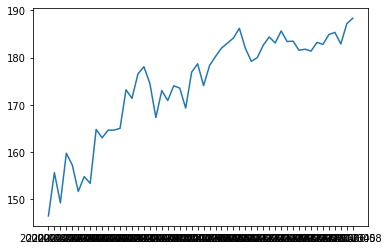

In [7]:
plt.plot(df.Date, df.Close)

In [8]:
import statsmodels.api as sm
import statsmodels.tsa.stattools as sts

In [9]:
df.set_index(["Date"], inplace=True)
train = df
train.head()

,Close
Date,
2020-03-25,146.51
2020-03-26,155.68
2020-03-27,149.28
2020-03-30,159.78
2020-03-31,157.27


In [10]:
def tagADF(t):

    result = pd.DataFrame(index=["Test Statistic Value", "p-value", "Lags Used",

                                "Number of Observations Used",

                                "Critical Value(1%)", "Critical Value(5%)", "Critical Value(10%)"],

                          columns=['value']

    )

    result['value']['Test Statistic Value']=t[0]

    result['value']['p-value']=t[1]

    result['value']['Lags Used']=t[2]

    result['value']['Number of Observations Used'] = t[3]

    result['value']['Critical Value(1%)']=t[4]['1%']

    result['value']['Critical Value(5%)']=t[4]['5%']

    result['value']['Critical Value(10%)']=t[4]['10%']

    print('t is:', t)

    return result

In [11]:
adf_data = sts.adfuller(train)
tagADF(adf_data)
#p-value=0.492624 >> 5%

t is: (-2.3113820167810295, 0.16832331816517104, 0, 51, {'1%': -3.5656240522121956, '5%': -2.920142229157715, '10%': -2.598014675124952}, 205.78758010532135)


,value
Test Statistic Value,-2.31138
p-value,0.168323
Lags Used,0
Number of Observations Used,51
Critical Value(1%),-3.56562
Critical Value(5%),-2.92014
Critical Value(10%),-2.59801


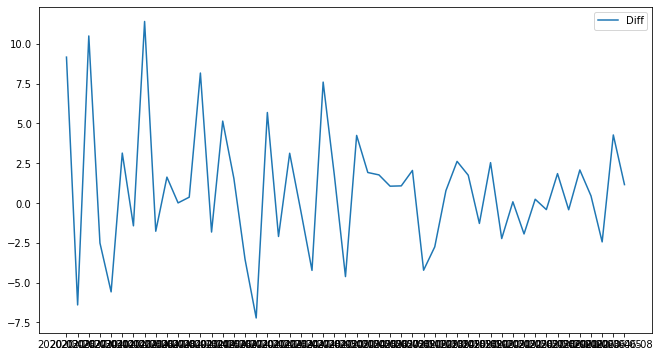

In [12]:
diff = train.diff(1).dropna()  
plt.figure(figsize=(11,6))  
plt.plot(diff, label='Diff')  
plt.legend(loc=0)  

In [13]:
adf_Data1 = sts.adfuller(diff)
tagADF(adf_Data1)  

#p-value<5%, reject H0

t is: (-11.092144647440097, 4.0570451739910585e-20, 0, 50, {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}, 204.12491068120374)


,value
Test Statistic Value,-11.0921
p-value,4.05705e-20
Lags Used,0
Number of Observations Used,50
Critical Value(1%),-3.56849
Critical Value(5%),-2.92136
Critical Value(10%),-2.59866


In [14]:
#deterine ARIMA p,q with AIC,BIC
ic = sm.tsa.arma_order_select_ic(train, max_ar=8, max_ma=8,ic=['aic', 'bic', 'hqic'])


/Users/huangzhiyi/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/huangzhiyi/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/huangzhiyi/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/huangzhiyi/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/huangzhiyi/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to conv

/Users/huangzhiyi/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/huangzhiyi/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/huangzhiyi/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/huangzhiyi/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/huangzhiyi/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_p

In [15]:
ic

{'aic':             0           1           2           3           4           5  \
 0  400.851255  360.609327  339.739658  326.695440  325.073696  315.697954   
 1  302.047695  404.850177  364.609000  344.250473  302.345382         NaN   
 2  297.335748  299.321116  407.152484  308.905882  339.840318  334.736584   
 3  299.318504  298.909729         NaN  299.525282  375.320138  352.283127   
 4  301.237151  299.926057  301.939701  309.799847  306.688044  308.866759   
 5  301.571736  300.308528  300.154449  302.760139         NaN         NaN   
 6  300.070772  299.508262  305.880130  305.968418         NaN         NaN   
 7  302.070247  300.651876  404.405335  307.209059         NaN  303.025186   
 8  302.698736  304.732524  305.753274  300.402434  310.567233         NaN   
 
             6           7           8  
 0  315.716058  319.289696  309.016809  
 1  319.698066         NaN         NaN  
 2  300.314168  323.758461  334.403828  
 3  346.549653  305.432719  326.490723  
 4    

/Users/huangzhiyi/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/huangzhiyi/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/huangzhiyi/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


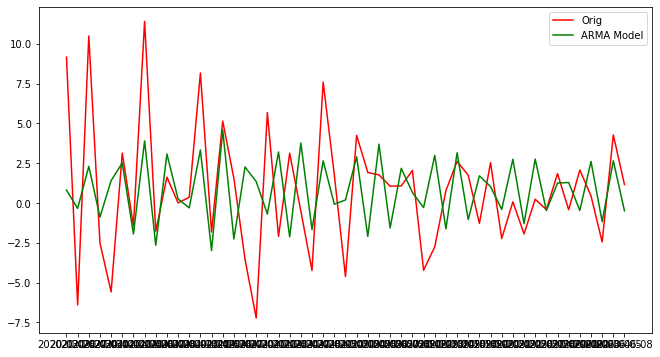

In [16]:
ARMAModel = sm.tsa.ARIMA(train, order=(2,1,2)).fit()  # order=(p,d,q)
# compare fittedvalues diff
plt.figure(figsize=(11, 6))
plt.plot(diff, 'r', label='Orig')
plt.plot(ARMAModel.fittedvalues, 'g',label='ARMA Model')
plt.legend()


In [17]:
df_pred = pd.DataFrame(ARMAModel.predict())
train_shift = train.shift(1)  
un = pd.concat([df_pred,train_shift],axis =1)
un['col']=un[0]+un['Close']
pred_recover = un['col'].dropna()

In [18]:
# evaluate1, score score

df_fit = pd.DataFrame(ARMAModel.fittedvalues)
de = pd.concat([df_fit,diff],axis =1)
de['col']=de[0]+de['Close']
delta = de['col']
score = 1 - delta.var()/train.var()

print('score:\n', score)

score:
 Close    0.789131
dtype: float64


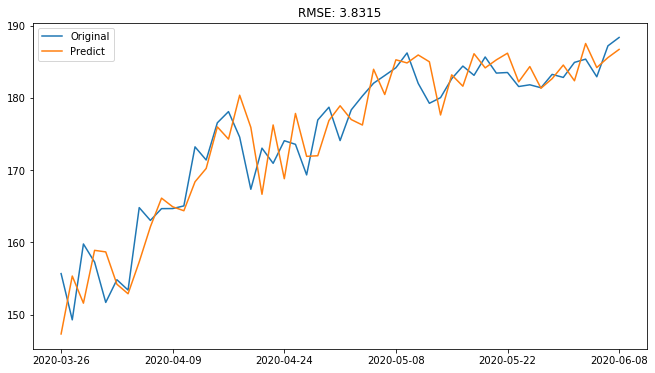

In [19]:
# evaluate2,RMSE

os = pd.concat([pred_recover,train],axis =1)
os.dropna(inplace=True)
train_vs = os['Close']  
plt.figure(figsize=(11, 6))
train_vs.plot(label='Original')
pred_recover.plot(label='Predict')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((pred_recover-train_vs)**2)/train_vs.size))
plt.show()

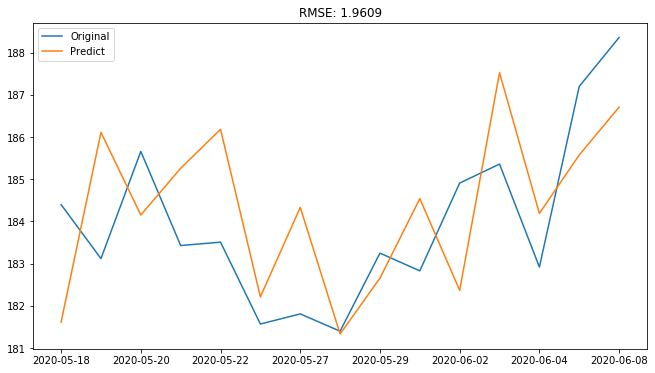

In [20]:
# tails
train_t = train_vs.tail(15)
pred_t = pred_recover.tail(15)
plt.figure(figsize=(11, 6))
train_t.plot(label='Original')
pred_t.plot(label='Predict')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((pred_t-train_t)**2)/train_t.size))
plt.show()


In [21]:
# predict June 13, 
f = ARMAModel.forecast(3)  

print('June 13th MSFT STOCK CLOSE：%.2f $' % f[0][1]) #delay 1 day

#----结束-----


June 13th MSFT STOCK CLOSE：190.89 $
